In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
x_train = train_datagen.flow_from_directory(r'/content/drive/My Drive/RGB BOTTLES/train',target_size = (64,64),batch_size = 32 , class_mode = 'categorical')
x_test = test_datagen.flow_from_directory(r'/content/drive/My Drive/RGB BOTTLES/test',target_size = (64,64),batch_size = 32 , class_mode = 'categorical')

Found 722 images belonging to 6 classes.
Found 105 images belonging to 6 classes.


In [ ]:
print(x_train.class_indices)

{'Blueb': 0, 'Greenb': 1, 'Redb': 2, 'orangeb': 3, 'purpleb': 4, 'yellowb': 5}


In [ ]:
from keras.models import Sequential
model = Sequential()

In [ ]:
from keras.layers.convolutional import Conv2D
model.add(Conv2D(32,(3,3), input_shape = (64,64,3),activation = "relu"))

In [ ]:
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
model.add(MaxPooling2D(pool_size = (2,2)))

In [ ]:
model.add(Flatten()) 

In [ ]:
model.add(Dense(units = 128,init = "random_uniform",activation = "relu")) #hdden layer

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=128, activation="relu", kernel_initializer="random_uniform")`
  """Entry point for launching an IPython kernel.


In [ ]:
model.add(Dense(units =6,init = "random_uniform",activation = "softmax")) #output layer

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=6, activation="softmax", kernel_initializer="random_uniform")`
  """Entry point for launching an IPython kernel.


In [ ]:
model.compile(loss = "categorical_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [ ]:
history = model.fit_generator(x_train , steps_per_epoch =  47 , epochs = 25, validation_data = x_test, validation_steps = 20)

Epoch 1/25
10/47 [=====>........................] - ETA: 18s - loss: 0.0529 - accuracy: 0.9875

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


47/47 [==============================] - 25s 529ms/step - loss: 0.0633 - accuracy: 0.9824 - val_loss: 7.3831 - val_accuracy: 0.5524
Epoch 2/25
47/47 [==============================] - 24s 503ms/step - loss: 0.0695 - accuracy: 0.9817 - val_loss: 2.1251 - val_accuracy: 0.5429
Epoch 3/25
47/47 [==============================] - 24s 518ms/step - loss: 0.0854 - accuracy: 0.9722 - val_loss: 8.8607 - val_accuracy: 0.5048
Epoch 4/25
47/47 [==============================] - 24s 505ms/step - loss: 0.1046 - accuracy: 0.9682 - val_loss: 3.1329 - val_accuracy: 0.4952
Epoch 5/25
47/47 [==============================] - 24s 506ms/step - loss: 0.0768 - accuracy: 0.9749 - val_loss: 7.0271 - val_accuracy: 0.5143
Epoch 6/25
47/47 [==============================] - 23s 499ms/step - loss: 0.0538 - accuracy: 0.9824 - val_loss: 8.7479 - val_accuracy: 0.5333
Epoch 7/25
47/47 [==============================] - 24s 508ms/step - loss: 0.0528 - accuracy: 0.9810 - val_loss: 6.1766 - val_accuracy: 0.5238
Epoch 8/25

In [ ]:
model.save("bottles_final.h5")

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 30752)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               3936384   
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 774       
Total params: 3,938,054
Trainable params: 3,938,054
Non-trainable params: 0
_________________________________________________________________


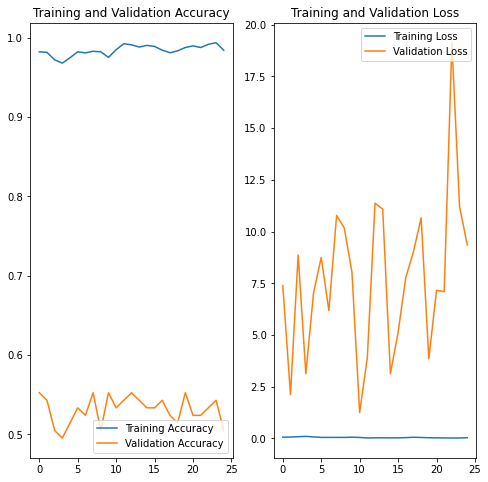

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import cv2
import numpy as np

In [ ]:
from keras.preprocessing import image
from keras.models import load_model

model = load_model('bottles_final.h5')
video = cv2.VideoCapture(0)
name = ["Blueb", "Greenb", "Redb", "orangeb", "purpleb","yellowb"]

while(1):
    success, frame = video.read()
    cv2.imwrite("image.jpg",frame)
    img = image.load_img("image.jpg",target_size = (64,64))
    x = image.img_to_array(img)
    x = np.expand_dims(x,axis = 0)
    pred = model.predict_classes(x)
    p = pred[0]
    print(pred)
    cv2.putText(frame,"predicted = " +str(name[p]),(100,100), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0),1)
    cv2.imshow("image",frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video.release()
cv2.destroyAllWindows()


error: ignored

In [ ]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np 

In [ ]:
model = load_model("bottles_final.h5")

In [ ]:
img = image.load_img("/content/drive/My Drive/RGB BOTTLES/test/purpleb/[www.google.com][67472].jpg",target_size= (64,64))

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x,axis = 0)

In [ ]:
x.shape

(1, 64, 64, 3)

In [ ]:
pred = model.predict_classes(x)

In [ ]:
pred

array([4])

In [ ]:
print(x_train.class_indices)

{'Blueb': 0, 'Greenb': 1, 'Redb': 2, 'orangeb': 3, 'purpleb': 4, 'yellowb': 5}
